# Logistic regression

Logistic regression is a Machine Learning model used for the classification problems. For the examples here we will be creating models for the __binary classification__ problems where the label y can take one of two values (frequently noted as 1 and 0).

One example for the binary classification problem can be classification of received an email which can be classified as spam or not spam. Another example can be classification of the type of breast cancer found in patients.

Logistic regression can be extended to the multi-class cases as well.



Lets take a look back at the linear model used for regression problems. We have chosen the $h(x) = \theta^Tx$ to be the estimator function of our values y.

Intuitively for the classification problem we want our model to output the probability of the data point classified as 0 or 1.

It is easy to see that the previous linear model does not work well for classification problem since it does not make much sense to have the output larger then 1 or it is smaller then 0.
Ideally we want the output to be between 0 and 1, to achieve this we use the __sigmoid__ function on the linear regression classifier. Using this function maps the output to [0,1] which we can think of as a probability of a point being classified as 0 or 1.

$$
h(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}
$$
where
$$
g(z) = \frac{1}{1 + e^{-z}}
$$

The sigmoid function g(z) looks like:

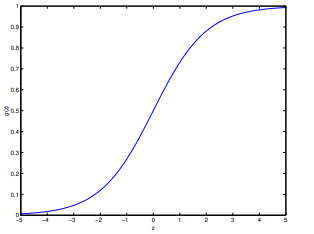

Now we need to create a estimator for the $\theta$ that can be derived from the training data.
Similarly as we found the way to calculate the coeffitients for the linear regression using the maximal likelihood we can use the same approach after making some assumptions.

Lets assume the following:

$$
P(y = 1|x;\theta) = h_\theta(x)
$$
$$
P(y = 0|x;\theta) = 1 -h_\theta(x)
$$
Which means, the probability of y being classified as 1 with the given x is $h_\theta(x)$, and the opposite, being classified as 0 is 1 - $h_\theta(x)$.

This can be written more compactly as:
$$
p(y|x;\theta) = (h_\theta(x))^y(1-h_\theta(x))^{1-y}
$$

Assuming that we have n training examples that were generated independantly we can write the likelihood of the parameters:

$$
L(\theta) = p(\vec{y}|X;\theta) = \prod_{i=1}^{m} p(y^i|x^i;\theta) = \prod_{i=1}^{m} h_\theta(x^i)^y(1-h_\theta(x^i)^{1 -y}
$$

For simplicity in the derivation we usually maximize the log of likelihood:

$$
\ell(\theta) = log L(\theta) = \sum_{i=1}^{m} y^i log (h_{\theta}(x)) + (1 - y^i)log(1 - h_\theta(x))
$$

We want to maximise this function, we can use the gradient descent similarly to the linear regression $\theta := \theta + \alpha\nabla_\theta \ell(\theta)$. Notice that now we have plus sign since we want to maximize the function.

Lets calculate the partial derivative in respect to $\theta_j$ in one point of the dataset.

$$
\frac{\partial}{\partial\theta_j}\ell(\theta) = \frac{\partial}{\partial\theta_j}(y \log g(\theta^T x) + (1 - y)\log (1 - g(\theta^T x))
$$

$$
=...= (y(1 - g(\theta^T x)) + (1 - y) g(\theta^T x))x_j
$$

in this derivation we have used the identity:  $g'(\theta^T x) = g(\theta^T x)(1 - g(\theta^T x))$

And we are left with the stohastic gradient descent update rule:

$$
\theta_j := \theta_j + \alpha (y^i - h_\theta(x))x^i_j
$$

We can use this algorithm in an example to try and find the parameters of the model:

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
cancer = datasets.load_breast_cancer()
data = cancer.data
ones = np.ones((data.shape[0],1))
data = np.hstack((ones, data))
selected_features = data[:, [0, 1, 2]]

In [2]:
lr = LogisticRegression()
lr.fit(data[:, [ 1, 2]], cancer.target)

sklearn_theta = [lr.intercept_[0], lr.coef_[0][0], lr.coef_[0][1]]
print(sklearn_theta)

[19.671351031534847, -1.0462619024003446, -0.21688595452490797]


In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def batch_grad_desc(X, y, learning_rate, num_iterations):
    b = np.ones(X.shape[1])
    m = X.shape[0]
    
    for i in range(num_iterations):
        z = np.dot(X, b)
        prediction = sigmoid(z)
        gradient = np.dot(X.T, y - prediction) / m
        b += learning_rate * gradient
        
    return b

optimal_theta = batch_grad_desc(selected_features, cancer.target, 0.01, 500000)
print(optimal_theta)

[19.42086069 -1.0347902  -0.21260259]


Alternatively we can use Newtons algorythm for finding the point where $f(\theta) = 0$.
$$
\theta := \theta - \frac{f(\theta)}{f'(\theta)}
$$

Since we want to find the value of $\theta$ wher the gradient of loss function is 0 we can rewrite the Newtons rule as:

$$
\theta := \theta - \frac{\ell'(\theta)}{\ell''(\theta)}
$$

for $f(\theta) = \ell'(\theta)$

In the generalization of the Newtons method for the multidimensional setting we are rewriting the rule as:

$$
\theta := \theta - H^{-1}\nabla_\theta\ell(\theta)
$$
Where $H^{-1}$ is inverse Hessian. The values in Hessian matrix are given by

$$
H_{i,j}=\frac{\partial^2 \ell(\theta)}{\partial \theta_i \partial \theta_j}
$$


In [26]:
def newton_alg(X, y, num_iter=100):
    m, n = X.shape
    b = np.zeros(n)
    
    for iteration in range(num_iter):
        predictions = sigmoid(np.dot(X, b))
        gradient = np.dot(X.T, (predictions - y)) / m
        
        hessian = np.dot(X.T, (X.T * (predictions * (1 - predictions))).T) / m
        b -= np.linalg.inv(hessian).dot(gradient)
        
        return b
    
optimal_theta_newton = newton_alg(selected_features, cancer.target)


We can plot the decision boundaries found with these 3 methods:

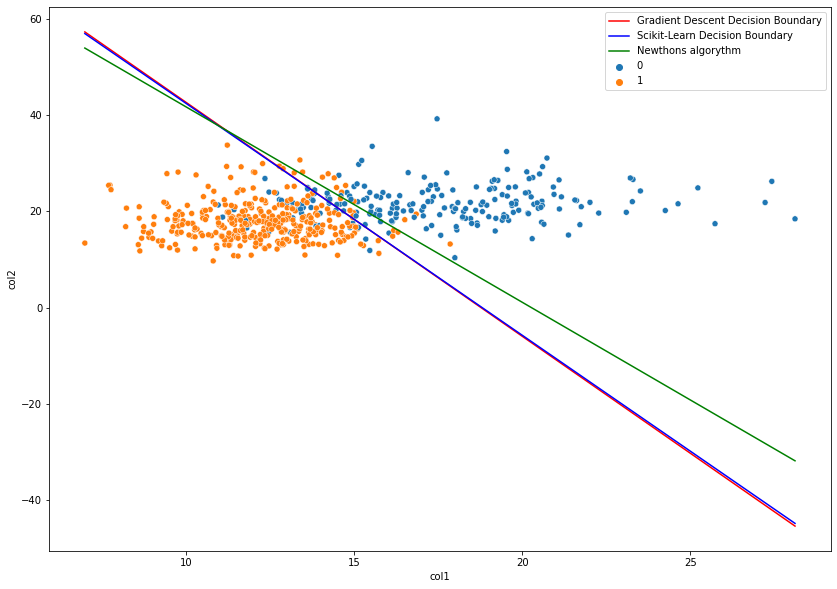

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data[:, [1, 2]], columns=('col1', 'col2'))
df['label'] = cancer.target

# Assuming optimal_theta and sklearn_theta are the coefficients from your models

# Normalize the coefficients
optimal_theta /= -optimal_theta[2]  # Divide by the coefficient of the bias term
sklearn_theta /= -sklearn_theta[2]  # Divide by the coefficient of the bias term
optimal_theta_newton /= -optimal_theta_newton[2]

x0_line = np.ones(100)  # Create a line of ones for x0
x1_line = np.linspace(df['col1'].min(), df['col1'].max(), 100)
x2_line = np.linspace(df['col2'].min(), df['col2'].max(), 100)

y_grad = optimal_theta[0] * x0_line + optimal_theta[1] * x1_line
y_sklearn = sklearn_theta[0] * x0_line + sklearn_theta[1] * x1_line
y_newton = optimal_theta_newton[0] * x0_line + optimal_theta_newton[1] * x1_line

plt.figure(figsize=(14, 10))
sns.scatterplot(x='col1', y='col2', data=df, hue='label')
sns.lineplot(x=x1_line, y=y_grad, color='red', label='Gradient Descent Decision Boundary')
sns.lineplot(x=x1_line, y=y_sklearn, color='blue', label='Scikit-Learn Decision Boundary')
sns.lineplot(x=x1_line, y=y_newton, color='green', label='Newthons algorythm ')
plt.legend()
plt.show()